In [40]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LeakyReLU, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras_visualizer import visualizer
import tensorflow as tf
import cv2
import os
import glob
from PIL import Image, ImageFilter


In [4]:

filelist = glob.glob('landscape Images/color/*.jpg')

x_train = np.array([np.array(Image.open(fname)).astype(np.float32) for fname in filelist])

#filelist = glob.glob('Phases of moon dataset/test/Full Moon/*.jpg')

#x_test = np.array([np.array(Image.open(fname)).astype(np.float32) for fname in filelist])


/var/folders/zd/f3cq2gln2pxbk84mk9txxxww0000gn/T/ipykernel_43213/197774381.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array([np.array(Image.open(fname)).astype(np.float32) for fname in filelist])


img = Image.open('Phases of moon dataset/test/Full Moon/1.jpg')
img.show()
arr = np.array(img).astype(np.float32)
img = Image.fromarray(np.uint8(arr), 'RGB')
img.show()

In [22]:
max_shape = (160,160,3) #tuple(max(image.shape[x] for image in x_train) for x in range(3))
image_batch = np.zeros((x_train.size,) + max_shape, dtype='float32')
for image_index, image in enumerate(x_train):
        image_batch[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image


image_test_batch = np.zeros((x_train.size,) + max_shape, dtype='float32')
for image_index, image in enumerate(x_test):
        image_test_batch[image_index, :image.shape[0], :image.shape[1], :image.shape[2]] = image

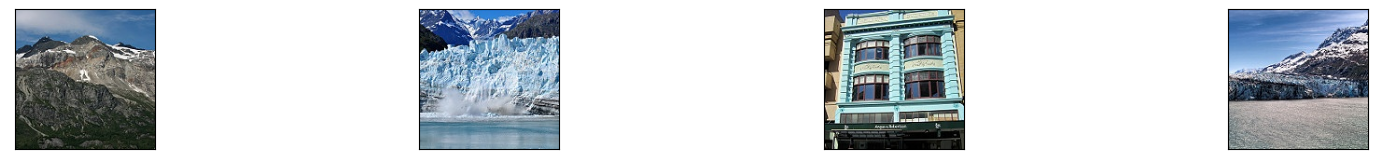

In [7]:
import matplotlib.pyplot as plt

n = 4  # how many digits we will display
%matplotlib inline 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(np.uint8(image_batch[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [44]:
# The encoding process
input_img = Input(shape=(None, None, 3))  

x = Conv2D(filters = 128, kernel_size = (3, 3), padding='same',strides =2)(input_img)
x = LeakyReLU()(x)

x = Conv2D(filters = 128, kernel_size = (3, 3), padding='same',strides =2)(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 256, kernel_size = (3, 3), padding='same',strides =2)(x)
#x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

#x = Conv2D(filters = 512, kernel_size =(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

In [45]:
# The decoding process
#x = Conv2D(512, (3, 3), activation='relu', padding='same')(encoded)
#x = UpSampling2D((2, 2))(x)

x = Conv2DTranspose(256, (3, 3), padding='same',strides =2)(x)
x = LeakyReLU()(x)

x = Conv2DTranspose(128, (3, 3), padding='same',strides =2)(x)
x = LeakyReLU()(x)

decoded = Conv2DTranspose(3, (3, 3), padding='same',strides =2)(x)

autoencoder = Model(input_img, decoded)
#autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy')

In [43]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 160, 160, 3)]     0         
                                                                 
 conv2d_46 (Conv2D)          (None, 80, 80, 128)       3584      
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 80, 80, 128)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 40, 40, 128)       147584    
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 40, 40, 128)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 20, 20, 256)       295168    
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 40, 40, 256)      5900

In [34]:
autoencoder.fit(image_batch, image_batch,
                epochs=10,
                batch_size=100)

Epoch 1/10


ValueError: in user code:

    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/keras/backend.py", line 5685, in binary_crossentropy
        bce = target * tf.math.log(output + epsilon())

    ValueError: Dimensions must be equal, but are 160 and 3 for '{{node binary_crossentropy/mul}} = Mul[T=DT_FLOAT](IteratorGetNext:1, binary_crossentropy/Log)' with input shapes: [?,160,160,3], [?,3,3,1].


1/1 [==============================] - 2s 2s/step


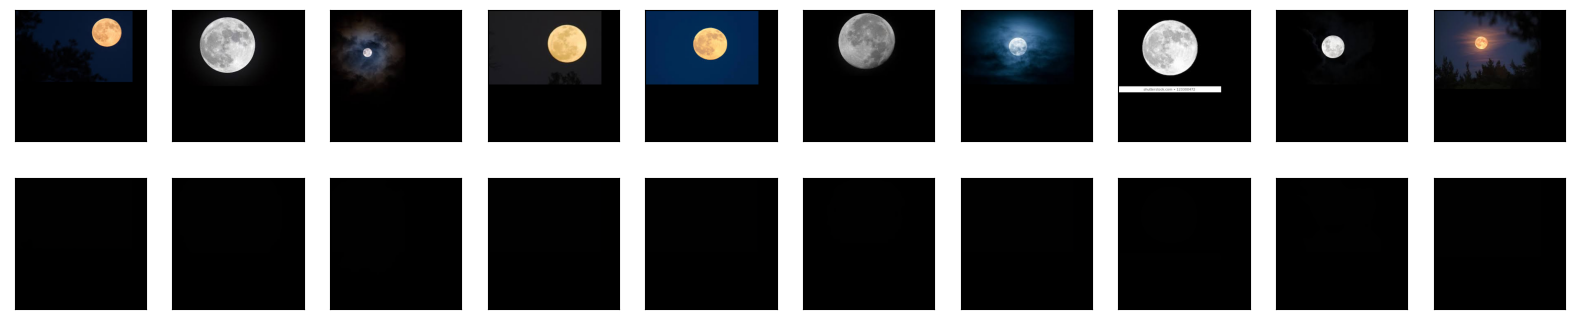

In [50]:
decoded_imgs = autoencoder.predict(image_batch)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(np.uint8(image_batch[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(np.uint8(decoded_imgs[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()